<a href="https://colab.research.google.com/github/AndrewCrossman/Graduate_Research/blob/main/Find_Disorder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find_Disorder.ipynb
---


>
Calculates the structural disorder in a spherical nanoparticle as a function of the radial distance from the center. This requires a perfectly unrelaxed lattice to compare to the relaxed/disordered lattice.

---

## Import Packages

In [1]:
import csv
import numpy as np
from astropy.coordinates import cartesian_to_spherical
import pandas as pd
import scipy as sp
from scipy import optimize
from google.colab import files
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Helper Functions and Gloabl Variables

In [2]:
def cartesian_to_spherical(x,y,z,lp):
    #takes x,y,z coords and lattice parameter
    x = x*lp
    y = y*lp
    z = z*lp
    r       =  np.sqrt((x*x + y*y + z*z))
    theta   =  np.arccos(z/r)*180/np.pi #to degrees
    phi     =  np.sign(y)*np.arccos(x/np.sqrt(x*x +y*y))*180/np.pi
    return [r,theta,phi]

## Extract Data and Name Variables

In [27]:
file_unrelaxed = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Control/STRs/Sphere100_Au_onAu_voidless.stru"
file_relaxed = "https://raw.githubusercontent.com/AndrewCrossman/Graduate_Research/main/Tests/MC_Sphere100_Au_onAu_r25_2000Cycles/2000_voidless.stru"
lattice_parameter = 4.0789
plotTitle = r'Structural Disorder: MMC_Au_r25A'
plotsavename1 = r'Stru_Dis_MMC_Au_r25A.png'
plotsavename2 = r'Error_Bars_MMC_Au_r25.png'
plotsavename3 = r'STD_vs_Radius_MMC_Au_r25.png'
plotsavename4 = r'deltaTheta_vs_deltaR_MMC_Au_r25.png'
#csvsavename = r'RMC_PtAu_CP.csv'

In [28]:
################################################################################
# Extract and Format data from "file_unrelaxed"
################################################################################
data1 = pd.read_csv(file_unrelaxed, skiprows=3)
data1 = data1.drop(data1.columns[3:], axis=1)
data1[["atoms", "x"]] = data1[data1.columns[0]].str.split(expand=True)
data1 = data1.drop(data1.columns[0], axis=1)
data1 = data1.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data1["x"] = data1["x"].astype(float)
data1["y"] = data1["y"].astype(float)
data1["z"] = data1["z"].astype(float)
data1["distance"], data1["theta"], data1["phi"] = cartesian_to_spherical(data1["x"], data1["y"], data1["z"],lattice_parameter)
data1 = data1.rename(columns={"x":"x_base", "y":"y_base", "z":"z_base", "distance":"distance_base", "theta":"theta_base", "phi":"phi_base"})
data1 = data1[["atom","x_base", "y_base", "z_base", "distance_base", "theta_base", "phi_base"]]

In [29]:
################################################################################
# Extract and Format data from "file_relaxed"
################################################################################
data2 = pd.read_csv(file_relaxed, skiprows=3)
data2 = data2.drop(data2.columns[3:], axis=1)
data2[["atoms", "x"]] = data2[data2.columns[0]].str.split(expand=True)
data2 = data2.drop(data2.columns[0], axis=1)
data2 = data2.set_axis(["y", "z", "atom", "x"], axis=1, inplace=False)
data2["x"] = data2["x"].astype(float)
data2["y"] = data2["y"].astype(float)
data2["z"] = data2["z"].astype(float)
data2["distance"], data2["theta"], data2["phi"] = cartesian_to_spherical(data2["x"], data2["y"], data2["z"],lattice_parameter)
data2 = data2.rename(columns={"x":"x_adj", "y":"y_adj", "z":"z_adj", "distance":"distance_adj", "theta":"theta_adj", "phi":"phi_adj"})
data2 = data2[["atom","x_adj", "y_adj", "z_adj", "distance_adj", "theta_adj", "phi_adj"]]

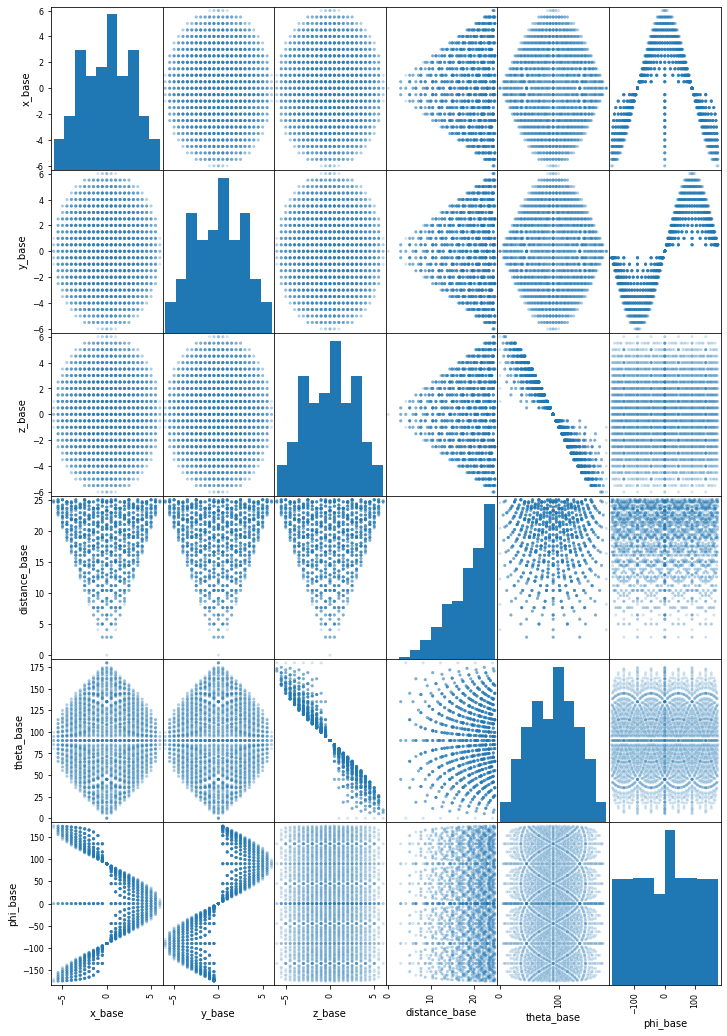

In [30]:
pd.plotting.scatter_matrix(data1, alpha=.2, figsize=(12,18));

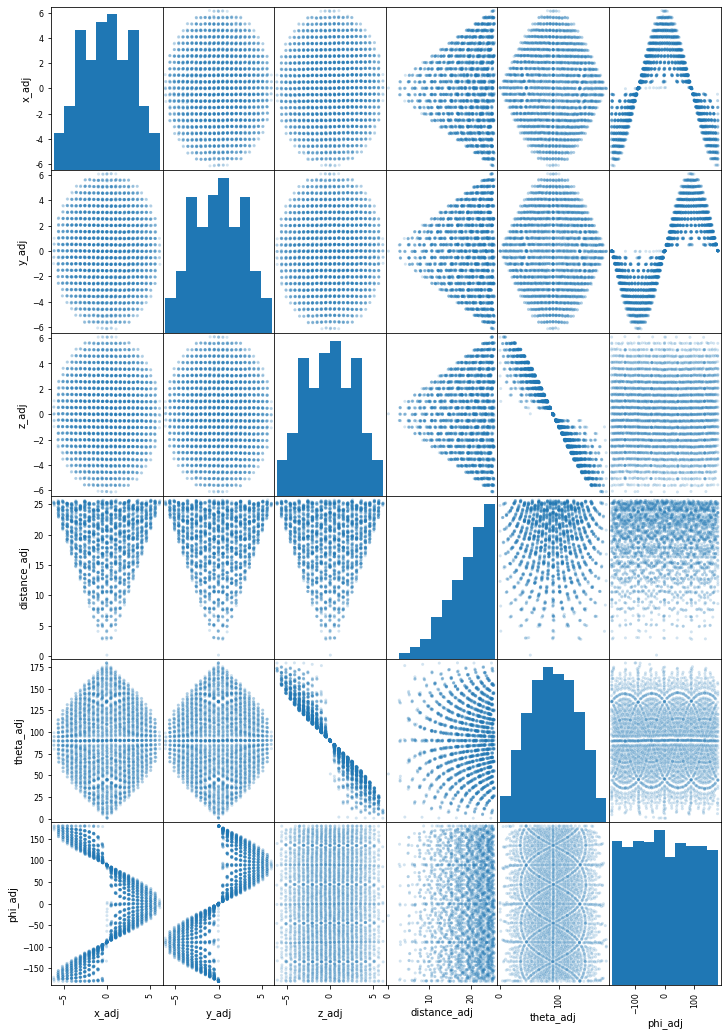

In [31]:
pd.plotting.scatter_matrix(data2, alpha=.2, figsize=(12,18));

In [32]:
################################################################################
# Combine formatted data from "file_unrelaxed" and "file_relaxed" and calculate
# the difference in each atoms' spherical coordinates 
################################################################################
data_total = pd.concat([data1, data2], axis=1)
data_total["delta_r"] = data_total["distance_adj"] - data_total["distance_base"]
data_total["delta_theta"] = data_total["theta_adj"] - data_total["theta_base"]
data_total["delta_phi"] = data_total["phi_adj"] - data_total["phi_base"]

In [33]:
data_total

atom  x_base  y_base  z_base  distance_base  theta_base    phi_base atom  \
0      AU    -1.0    -2.5    -5.5      24.978059  153.915458 -111.801409   AU   
1      AU     0.0    -2.5    -5.5      24.642768  155.556045  -90.000000   AU   
2      AU     1.0    -2.5    -5.5      24.978059  153.915458  -68.198591   AU   
3      AU    -2.0    -1.5    -5.5      24.642768  155.556045 -143.130102   AU   
4      AU    -1.5    -2.0    -5.5      24.642768  155.556045 -126.869898   AU   
...   ...     ...     ...     ...            ...         ...         ...  ...   
3920   AU    -0.5     0.5     6.0      24.642768    6.721369  135.000000   AU   
3921   AU     0.0     0.0     6.0      24.473400    0.000000         NaN   AU   
3922   AU     0.5     0.5     6.0      24.642768    6.721369   45.000000   AU   
3923   AU     1.0     0.0     6.0      24.810980    9.462322    0.000000   AU   
3924   AU     0.0     1.0     6.0      24.810980    9.462322   90.000000   AU   

         x_adj     y_adj     z_adj  distance_adj   theta_adj     phi_adj  \
0    -1.027780 -2.555274 -5.574285     25.360923  153.706262 -111.910933   
1    -0.072555 -2.642584 -5.573366     25.160870  154.623904  -91.572722   
2     0.985021 -2.532225 -5.578374     25.309134  154.030642  -68.744250   
3    -2.069476 -1.605065 -5.551569     25.037564  154.744322 -142.203200   
4    -1.558383 -2.105332 -5.540554     24.997607  154.697131 -126.509131   
...        ...       ...       ...           ...         ...         ...   
3920 -0.440346  0.497231  6.063310     24.879575    6.251361  131.527987   
3921  0.064384  0.002966  6.074137     24.777192    0.607939    2.637600   
3922  0.598935  0.488221  6.080080     24.999516    7.242836   39.185148   
3923  1.096990 -0.007742  6.080539     25.202322   10.226975   -0.404358   
3924  0.079739  0.966109  6.063818     25.047772    9.082752   85.281717   

       delta_r  delta_theta  delta_phi  
0     0.382864    -0.209197  -0.109524  
1     0.518102    -0.932141  -1.572722  
2     0.331075     0.115184  -0.545660  
3     0.394796    -0.811723   0.926902  
4     0.354839    -0.858914   0.360767  
...        ...          ...        ...  
3920  0.236807    -0.470009  -3.472013  
3921  0.303792     0.607939        NaN  
3922  0.356748     0.521467  -5.814852  
3923  0.391342     0.764653  -0.404358  
3924  0.236792    -0.379570  -4.718283  

[3925 rows x 17 columns]

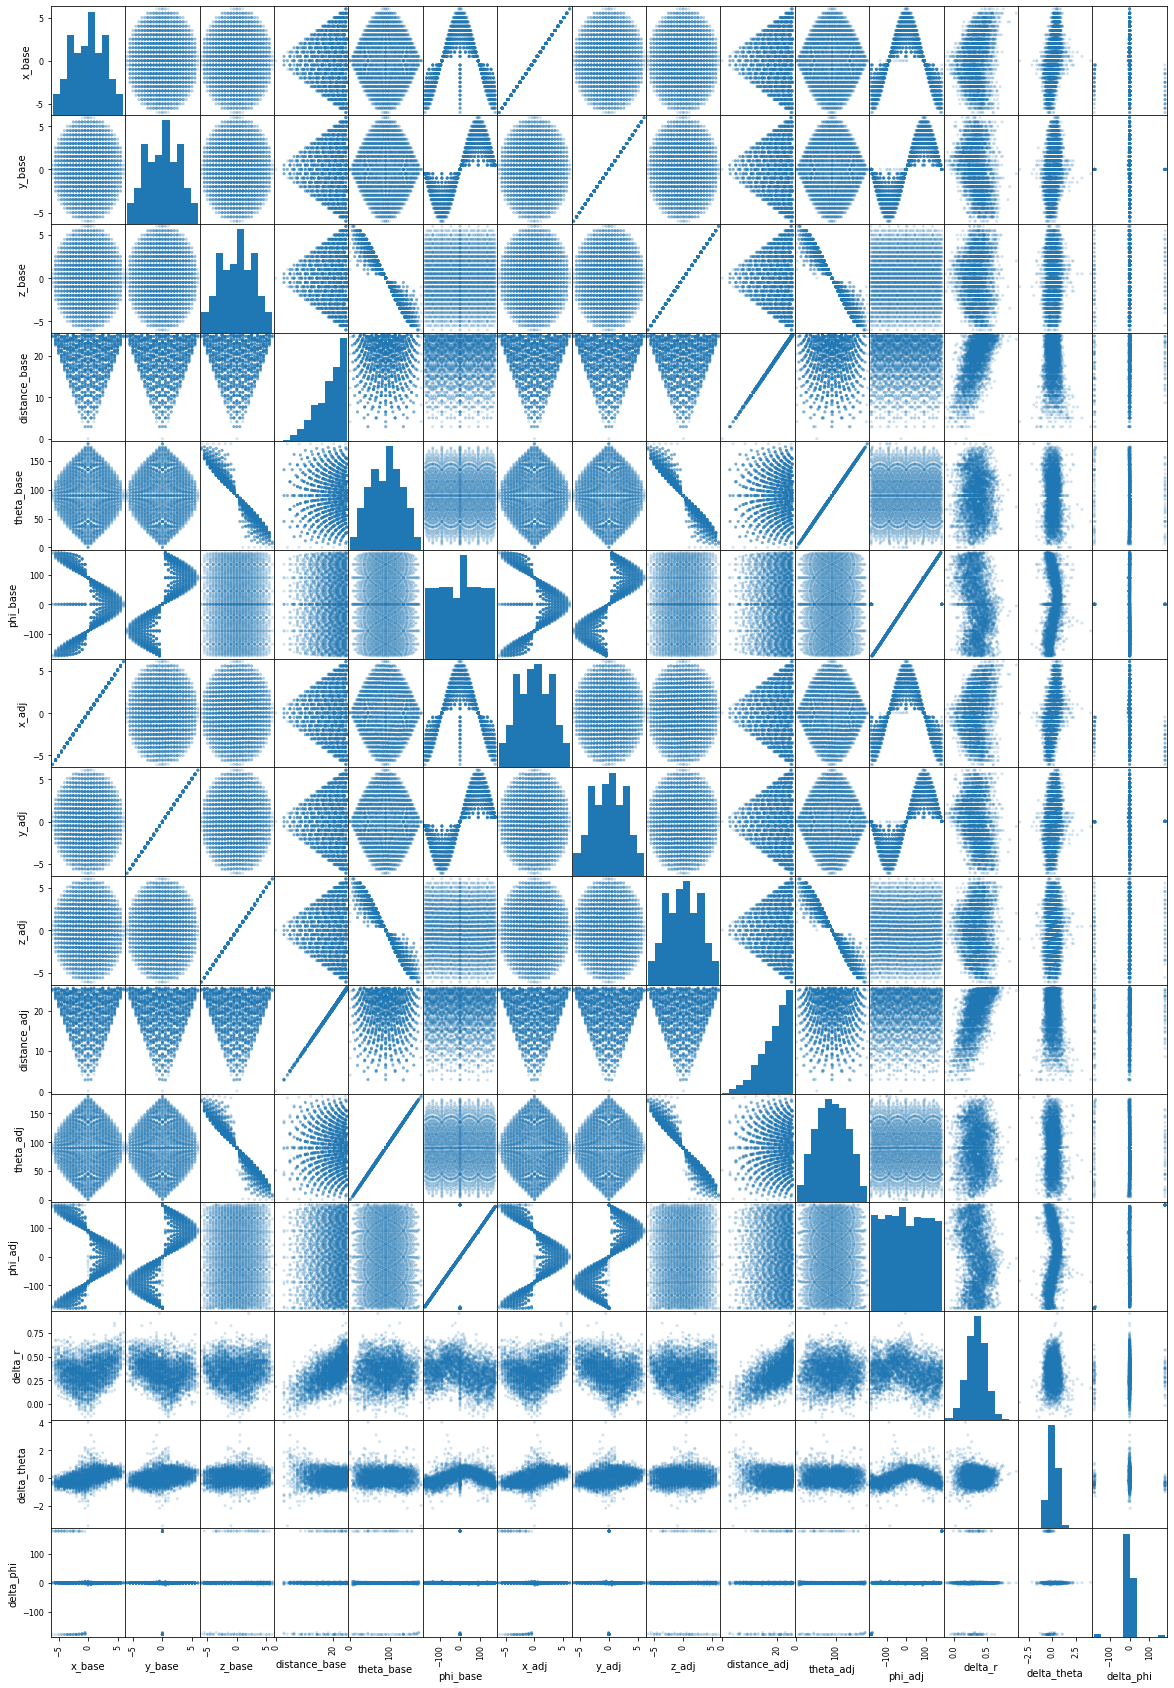

In [34]:
pd.plotting.scatter_matrix(data_total, alpha=.2, figsize=(20,30));

## Plots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

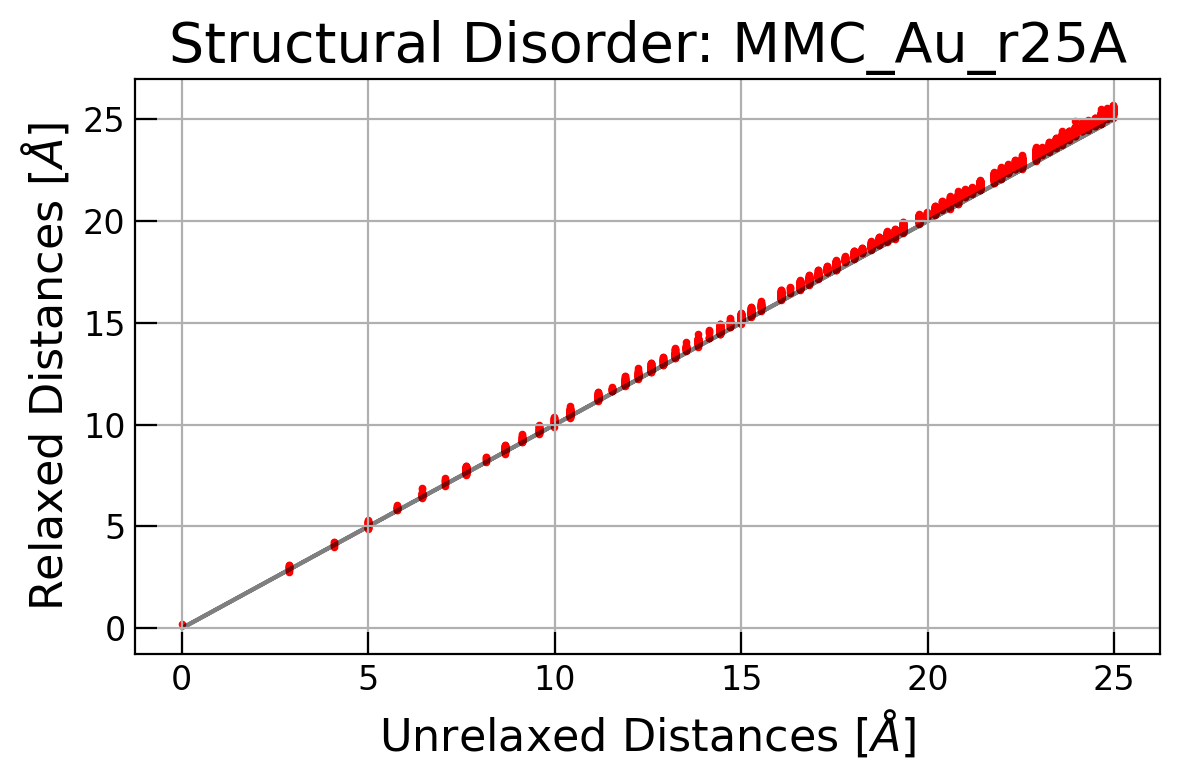

In [35]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
ax.plot(data_total.distance_base,data_total.distance_base, color='black', zorder=1, alpha=.5)
ax.scatter(data_total.distance_base, data_total.distance_adj, color='red', s=3, zorder=0)
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel(r'Relaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel(r'Unrelaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
#ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
plt.savefig(plotsavename1)
files.download(plotsavename1)

In [36]:
data_byNN1 = data_total.groupby("distance_base")["distance_adj"].mean()
data_byNN2 = data_total.groupby("distance_base")["distance_adj"].std()
data_byNN2 = data_byNN2.fillna(0)

In [37]:
data_byNN_total = pd.concat([data_byNN1, data_byNN2], axis=1)
data_byNN_total.columns = ["mean", "std"]
data_byNN_total["distance_base"] = data_byNN_total.index
print(len(data_byNN_total["distance_base"]))
print(len(data_byNN_total["mean"]))
data_byNN_total

92
92


mean       std  distance_base
distance_base                                    
0.000000        0.183950  0.000000       0.000000
2.884218        2.970126  0.099948       2.884218
4.078900        4.132968  0.095588       4.078900
4.995612        5.093243  0.132426       4.995612
5.768436        5.913843  0.071480       5.768436
...                  ...       ...            ...
24.473400      24.930925  0.106617      24.473400
24.642768      25.096642  0.119823      24.642768
24.810980      25.236529  0.142422      24.810980
24.978059      25.436343  0.111351      24.978059
24.978059      25.429510  0.107878      24.978059

[92 rows x 3 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

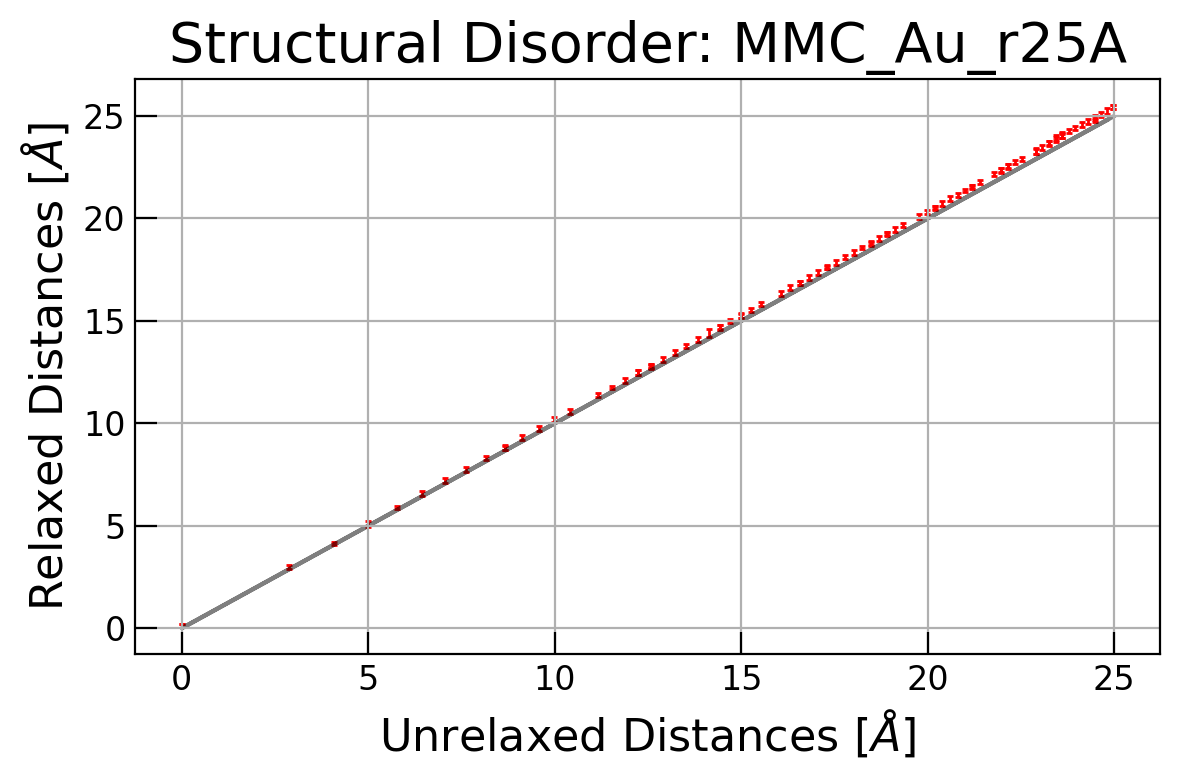

In [38]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
ax.plot(data_total.distance_base,data_total.distance_base, color='black', zorder=1, alpha=.5)
ax.errorbar(data_byNN_total["distance_base"], data_byNN_total["mean"], yerr=data_byNN_total["std"], color='red', fmt=' ', zorder=0, capsize=1, elinewidth=1,
   markeredgewidth=1)
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel(r'Relaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel(r'Unrelaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
#ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
plt.savefig(plotsavename2)
files.download(plotsavename2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

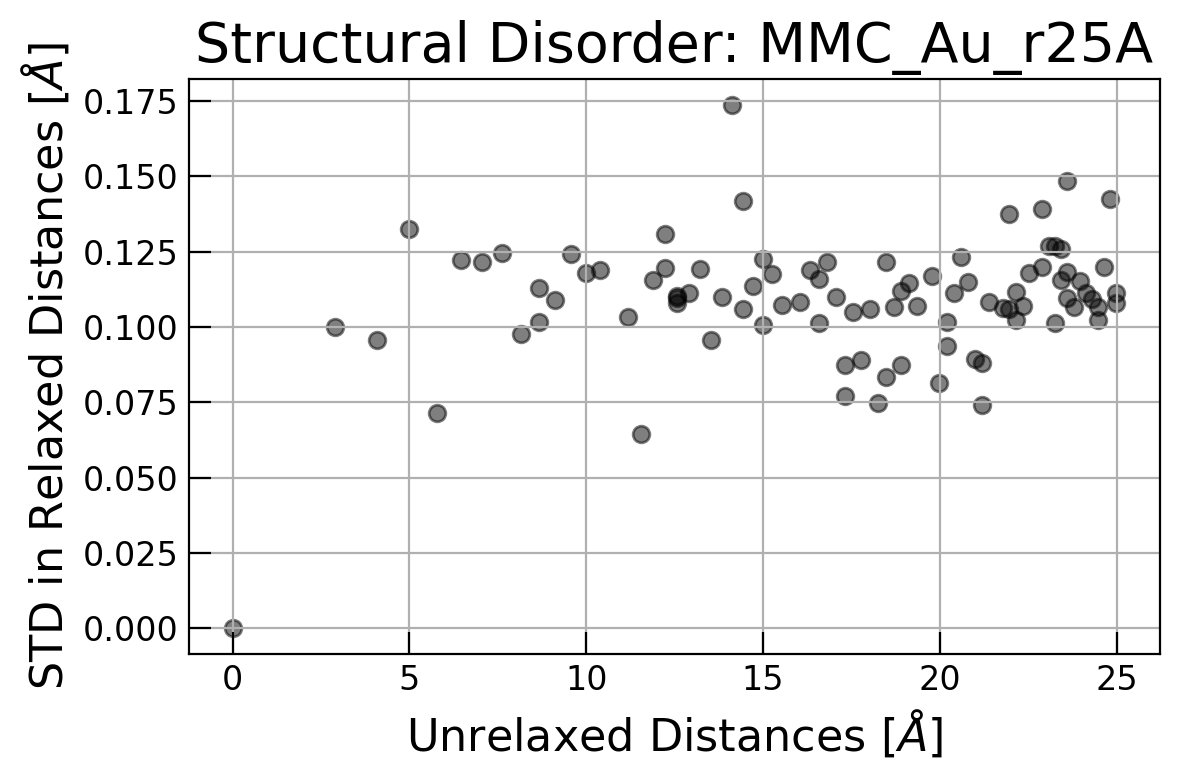

In [39]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
ax.scatter(data_byNN_total["distance_base"],data_byNN_total["std"], color='black', zorder=1, alpha=.5)
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel(r'STD in Relaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel(r'Unrelaxed Distances [$\AA$]', fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
#ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
plt.savefig(plotsavename3)
files.download(plotsavename3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

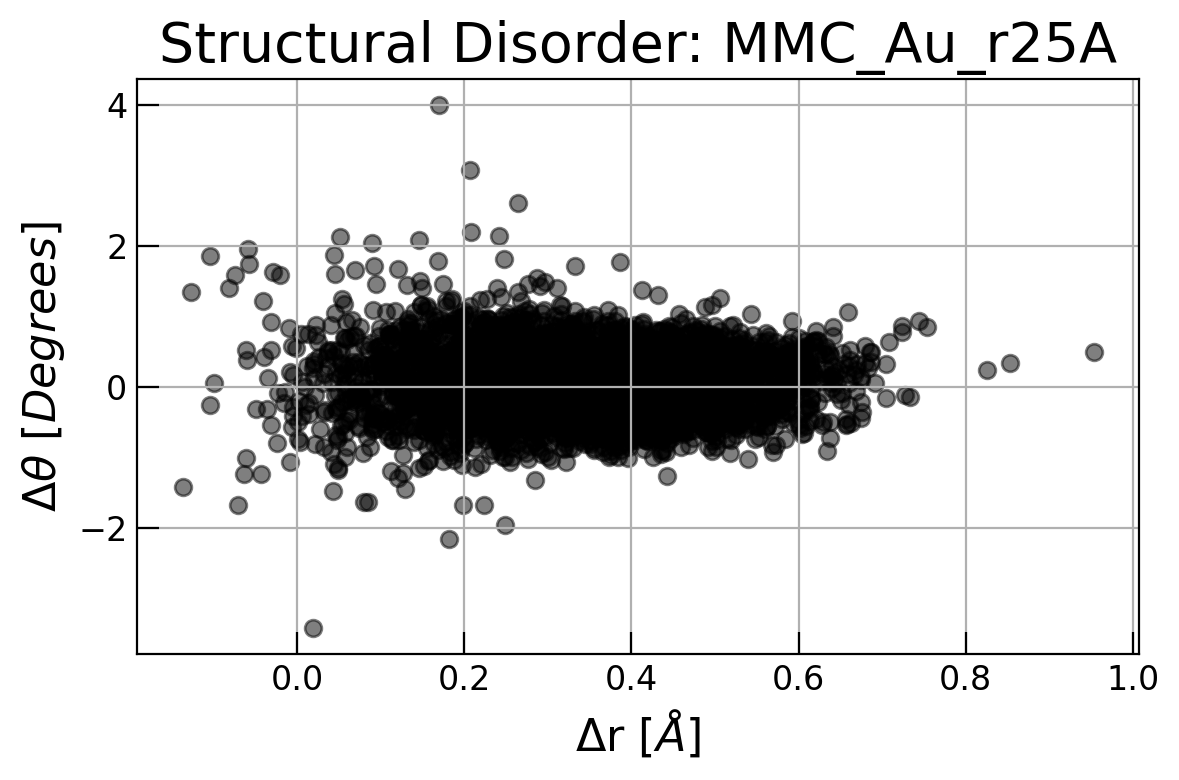

In [40]:
################################################################################
# Plot Data
################################################################################
fig, ax = plt.subplots(figsize=(6,4),dpi=200)
ax.scatter(data_total["delta_r"], data_total["delta_theta"], color='black', zorder=1, alpha=.5)
################################################################################
# Plot settings
################################################################################
ax.set_title(plotTitle, fontsize=20)
ax.set_ylabel(r'$\Delta\theta$ [$Degrees$]', fontsize=16)
ax.tick_params(axis='y', labelsize=12, direction='in', length=8)
ax.set_xlabel(r'$\Delta$r [$\AA$]', fontsize=16)
ax.tick_params(axis='x', labelsize=12, direction='in', length=8)
#ax.set_xlim(0,10)
#ax.set_ylim(0,10)
#ax.legend()
ax.grid(True)
plt.tight_layout()
# Uncomment to save and download plots
plt.savefig(plotsavename4)
files.download(plotsavename4)